# Loading pretrain model

In [1]:
%tensorflow_version 1.x
import tensorflow

TensorFlow 1.x selected.


In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from PIL import Image
import numpy as np
import os

Using TensorFlow backend.


In [0]:
# # fix random seed for reproducibility
# seed = 7
# np.random.seed(seed)

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train/=255
X_test/=255

In [0]:
# one hot encode
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [0]:
# pip install tensorflow-gpu==1.14 ## downgrade to support Keras

In [9]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [0]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [11]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=200)


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 38s 635us/step - loss: 0.4656 - accuracy: 0.8505 - val_loss: 0.0836 - val_accuracy: 0.9726
Epoch 2/2
60000/60000 [==============================] - 37s 620us/step - loss: 0.1542 - accuracy: 0.9534 - val_loss: 0.0523 - val_accuracy: 0.9842


In [12]:
# Final evaluation of the model
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.052333034266158936, 0.9842000007629395]


# Validation

In [13]:
from google.colab import drive

drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


# invert image

[7]


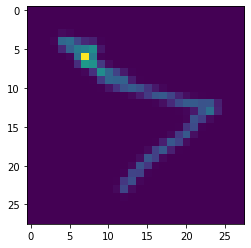

In [14]:
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage import color
from skimage import io
from PIL import Image
import PIL.ImageOps    


image = Image.open('/content/drive/My Drive/Location plot/Microsoft_plot/160_10.png').convert("RGB")
invert_img = PIL.ImageOps.invert(image)   #invert image
invert_img = np.asarray(invert_img)   #convert image to nparray

gray_img = color.rgb2gray(invert_img) #convert to grayscale
gray_img = resize(gray_img, (28, 28)) #resize to fit network
plt.imshow(gray_img);

im2arr = gray_img.reshape(1,28,28,1) #reshape

y_pred = model.predict_classes(im2arr) #make prediction
print(y_pred)

[5]


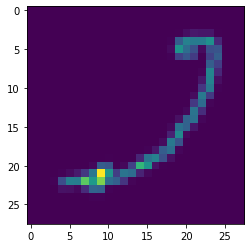

In [0]:
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage import color
from skimage import io
from PIL import Image
import PIL.ImageOps    


image = Image.open('/content/drive/My Drive/Location plot/18_18_Dv0.png').convert("RGB")
invert_img = PIL.ImageOps.invert(image)   #invert image
invert_img = np.asarray(invert_img)   #convert image to nparray

gray_img = color.rgb2gray(invert_img) #convert to grayscale
gray_img = resize(gray_img, (28, 28)) #resize to fit network
plt.imshow(gray_img);

im2arr = gray_img.reshape(1,28,28,1) #reshape

y_pred = model.predict_classes(im2arr) #make prediction
print(y_pred)

In [0]:
def make_prediction(filename):
  image = Image.open("/content/drive/My Drive/Location plot/" + filename).convert("RGB")
  invert_img = PIL.ImageOps.invert(image)   #invert image
  invert_img = np.asarray(invert_img)   #convert image to nparray

  gray_img = color.rgb2gray(invert_img) #convert to grayscale
  gray_img = resize(gray_img, (28, 28)) #resize to fit network
  # plt.imshow(gray_img);

  im2arr = gray_img.reshape(1,28,28,1) #reshape

  y_pred = model.predict_classes(im2arr) #make prediction
  print(y_pred)

  return gray_img

[5]
[7]
[5]
[5]
[5]






<Figure size 432x288 with 0 Axes>

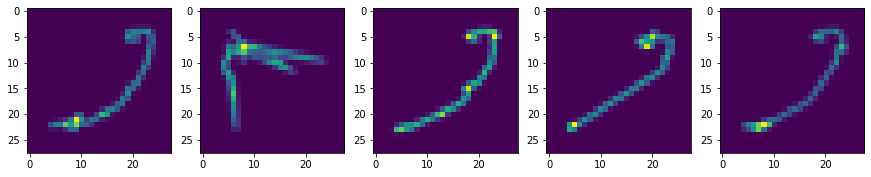

In [0]:

# a = make_prediction("18_18_Dv0 (1).png")
# b = make_prediction("18_18_Dv1 (1).png")
# c = make_prediction("18_18_Dv2 (1).png")
# d = make_prediction("18_18_Dv3 (1).png")
# e = make_prediction("18_18_Dv4 (1).png")


a = make_prediction("18_18_Dv0.png")
b = make_prediction("18_18_Dv1.png")
c = make_prediction("18_18_Dv2.png")
d = make_prediction("18_18_Dv3.png")
e = make_prediction("18_18_Dv4.png")
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,5,figsize=(15,15)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(a)
axarr[1].imshow(b)
axarr[2].imshow(c)
axarr[3].imshow(d)
axarr[4].imshow(e)

print ("")
print ("")
print ("")
print ("")

[4]
[1]
[3]
[1]
[3]
Ground truth for Oct 18, 16:34 to 42: Abbie-1 and Gabi-2, Britney-3 and Ella-4



<Figure size 432x288 with 0 Axes>

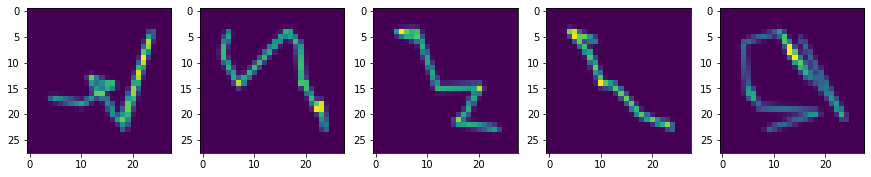

In [0]:

a = make_prediction("Abbie_16_32_2.png")
b = make_prediction("Gabi_16_32_2.png")
c = make_prediction("Britney_16_32_2.png")
d = make_prediction("Ella_16_32_2.png")
e = make_prediction("Samer_16_32_2.png")


plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,5,figsize=(15,15)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(a)
axarr[1].imshow(b)
axarr[2].imshow(c)
axarr[3].imshow(d)
axarr[4].imshow(e)

print ("Ground truth for Oct 18, 16:34 to 42: Abbie-1 and Gabi-2, Britney-3 and Ella-4")
print ("")


[2]
[3]
[1]
[2]
[4]
Ground truth for Oct 18, 18:12 Britney(3) walking + talking w-Gabi(2) @ parallel w- Abbie(1) and Ella(4)
1,2,3,4 should have the same label, 5 should have different label


<Figure size 432x288 with 0 Axes>

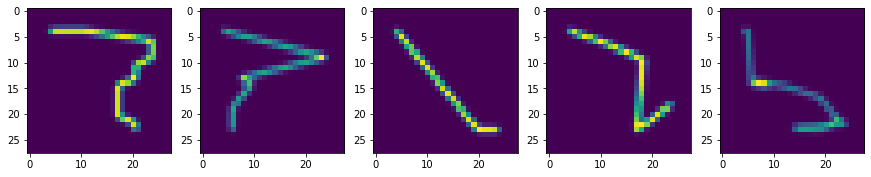

In [0]:

a = make_prediction("Abbie_18_12.png")
b = make_prediction("Gabi_18_12.png")
c = make_prediction("Britney_18_12.png")
d = make_prediction("Ella_18_12.png")
e = make_prediction("Samer_18_12.png")


plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,5,figsize=(15,15)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(a)
axarr[1].imshow(b)
axarr[2].imshow(c)
axarr[3].imshow(d)
axarr[4].imshow(e)

print ("Ground truth for Oct 18, 18:12 Britney(3) walking + talking w-Gabi(2) @ parallel w- Abbie(1) and Ella(4)")
print ("1,2,3,4 should have the same label, 5 should have different label")


[3]
[2]






<Figure size 432x288 with 0 Axes>

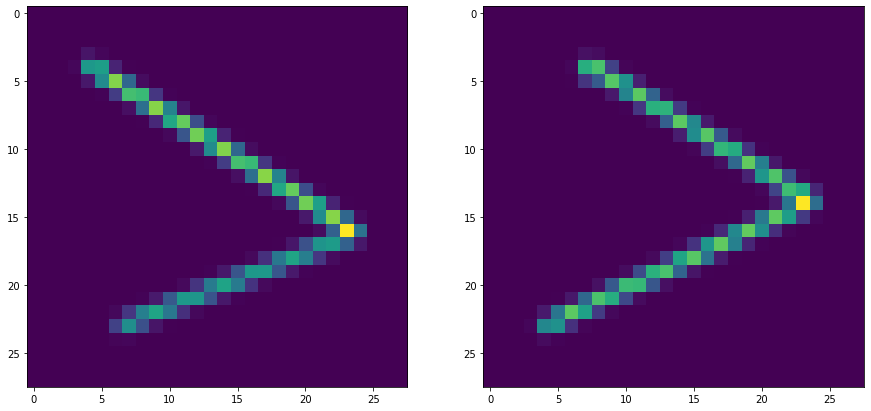

In [0]:
a = make_prediction("1.png")
b = make_prediction("2.png")

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2,figsize=(15,15)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(a)
axarr[1].imshow(b)


print ("")
print ("")
print ("")
print ("")

[3]
[2]






<Figure size 432x288 with 0 Axes>

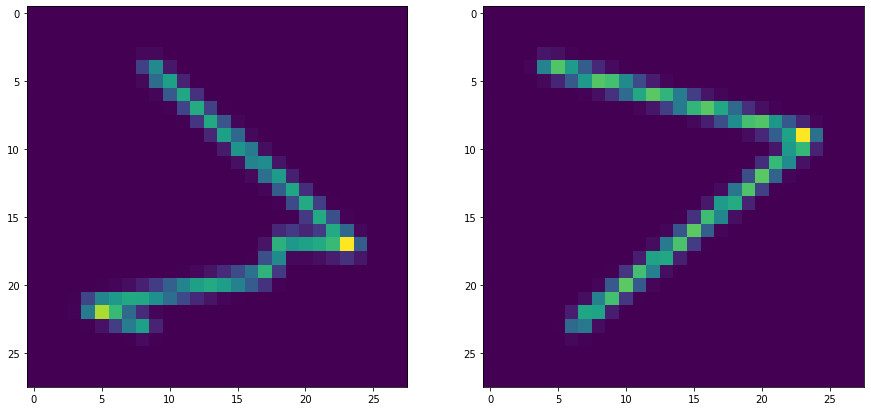

In [0]:
a = make_prediction("9.png")
b = make_prediction("10.png")

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2,figsize=(15,15)) 


axarr[0].imshow(a)
axarr[1].imshow(b)


print ("")
print ("")
print ("")
print ("")

[1]
[1]






<Figure size 432x288 with 0 Axes>

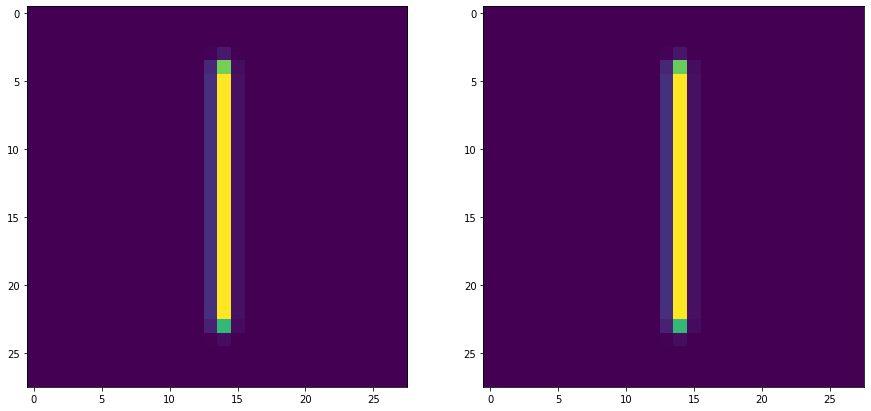

In [0]:
a = make_prediction("11.png")
b = make_prediction("12.png")

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2,figsize=(15,15)) 


axarr[0].imshow(a)
axarr[1].imshow(b)


print ("")
print ("")
print ("")
print ("")

# Microsoft Data 

In [0]:
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage import color
from skimage import io
from PIL import Image
import PIL.ImageOps    

[7]


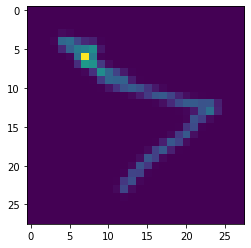

In [20]:
image = Image.open('/content/drive/My Drive/Location plot/Microsoft_plot/160_10.png').convert("RGB")
invert_img = PIL.ImageOps.invert(image)   #invert image
invert_img = np.asarray(invert_img)   #convert image to nparray

gray_img = color.rgb2gray(invert_img) #convert to grayscale
gray_img = resize(gray_img, (28, 28)) #resize to fit network
plt.imshow(gray_img);

im2arr = gray_img.reshape(1,28,28,1) #reshape

y_pred = model.predict_classes(im2arr) #make prediction
print(y_pred)

[2]


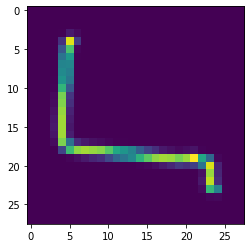

In [0]:
image = Image.open('/content/drive/My Drive/Location plot/Microsoft_plot/151_14.png').convert("RGB")
invert_img = PIL.ImageOps.invert(image)   #invert image
invert_img = np.asarray(invert_img)   #convert image to nparray

gray_img = color.rgb2gray(invert_img) #convert to grayscale
gray_img = resize(gray_img, (28, 28)) #resize to fit network
plt.imshow(gray_img);

im2arr = gray_img.reshape(1,28,28,1) #reshape

y_pred = model.predict_classes(im2arr) #make prediction
print(y_pred)

[2]


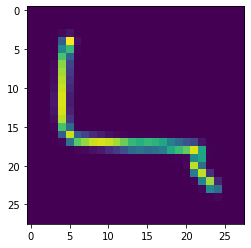

In [0]:
image = Image.open('/content/drive/My Drive/Location plot/Microsoft_plot/154_7.png').convert("RGB")
invert_img = PIL.ImageOps.invert(image)   #invert image
invert_img = np.asarray(invert_img)   #convert image to nparray

gray_img = color.rgb2gray(invert_img) #convert to grayscale
gray_img = resize(gray_img, (28, 28)) #resize to fit network
plt.imshow(gray_img);

im2arr = gray_img.reshape(1,28,28,1) #reshape

y_pred = model.predict_classes(im2arr) #make prediction
print(y_pred)

[2]


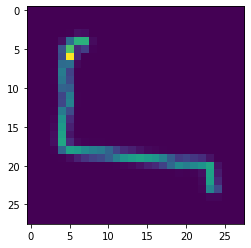

In [0]:
image = Image.open('/content/drive/My Drive/Location plot/Microsoft_plot/156_4.png').convert("RGB")
invert_img = PIL.ImageOps.invert(image)   #invert image
invert_img = np.asarray(invert_img)   #convert image to nparray

gray_img = color.rgb2gray(invert_img) #convert to grayscale
gray_img = resize(gray_img, (28, 28)) #resize to fit network
plt.imshow(gray_img);

im2arr = gray_img.reshape(1,28,28,1) #reshape

y_pred = model.predict_classes(im2arr) #make prediction
print(y_pred)

[2]


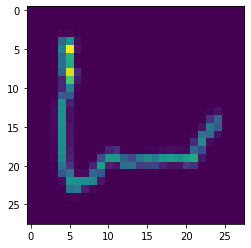

In [0]:
image = Image.open('/content/drive/My Drive/Location plot/Microsoft_plot/143_9.png').convert("RGB")
invert_img = PIL.ImageOps.invert(image)   #invert image
invert_img = np.asarray(invert_img)   #convert image to nparray

gray_img = color.rgb2gray(invert_img) #convert to grayscale
gray_img = resize(gray_img, (28, 28)) #resize to fit network
plt.imshow(gray_img);

im2arr = gray_img.reshape(1,28,28,1) #reshape

y_pred = model.predict_classes(im2arr) #make prediction
print(y_pred)

[2]


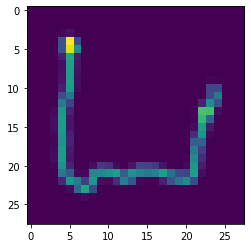

In [0]:
image = Image.open('/content/drive/My Drive/Location plot/Microsoft_plot/143_11.png').convert("RGB")
invert_img = PIL.ImageOps.invert(image)   #invert image
invert_img = np.asarray(invert_img)   #convert image to nparray

gray_img = color.rgb2gray(invert_img) #convert to grayscale
gray_img = resize(gray_img, (28, 28)) #resize to fit network
plt.imshow(gray_img);

im2arr = gray_img.reshape(1,28,28,1) #reshape

y_pred = model.predict_classes(im2arr) #make prediction
print(y_pred)

[7]


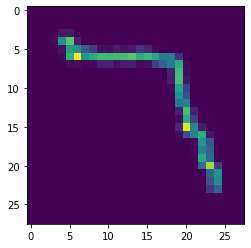

In [0]:
image = Image.open('/content/drive/My Drive/Location plot/Microsoft_plot/130_11.png').convert("RGB")
invert_img = PIL.ImageOps.invert(image)   #invert image
invert_img = np.asarray(invert_img)   #convert image to nparray

gray_img = color.rgb2gray(invert_img) #convert to grayscale
gray_img = resize(gray_img, (28, 28)) #resize to fit network
plt.imshow(gray_img);

im2arr = gray_img.reshape(1,28,28,1) #reshape

y_pred = model.predict_classes(im2arr) #make prediction
print(y_pred)

[7]


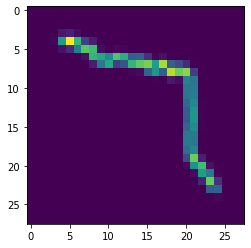

In [0]:
image = Image.open('/content/drive/My Drive/Location plot/Microsoft_plot/130_12.png').convert("RGB")
invert_img = PIL.ImageOps.invert(image)   #invert image
invert_img = np.asarray(invert_img)   #convert image to nparray

gray_img = color.rgb2gray(invert_img) #convert to grayscale
gray_img = resize(gray_img, (28, 28)) #resize to fit network
plt.imshow(gray_img);

im2arr = gray_img.reshape(1,28,28,1) #reshape

y_pred = model.predict_classes(im2arr) #make prediction
print(y_pred)

# Generate Mircrosoft prediction
Using trajectory from data/000 folder

In [17]:
# get all image
import glob

files = []
for file in glob.glob("/content/drive/My Drive/Location plot/Microsoft_plot/*.png"):
    files.append(file)
print(files[0])

/content/drive/My Drive/Location plot/Microsoft_plot/0_2.png


In [0]:
y_pred_list = []

# for i in range (0,500):
for i in range (0,len(files)):
  image = Image.open(files[i]).convert("RGB")
  invert_img = PIL.ImageOps.invert(image)   #invert image
  invert_img = np.asarray(invert_img)   #convert image to nparray

  gray_img = color.rgb2gray(invert_img) #convert to grayscale
  gray_img = resize(gray_img, (28, 28)) #resize to fit network

  im2arr = gray_img.reshape(1,28,28,1) #reshape

  y_pred = model.predict_classes(im2arr) #make prediction
  y_pred_list.append(y_pred[0])

In [26]:
print (y_pred_list)

[7, 4, 1, 5, 2, 8, 1, 7, 1, 1, 4, 7, 4, 1, 7, 1, 1, 1, 7, 2, 7, 5, 2, 1, 1, 1, 4, 1, 1, 7, 7, 4, 1, 1, 7, 1, 1, 1, 7, 1, 7, 1, 4, 0, 1, 4, 7, 7, 1, 7, 1, 7, 7, 4, 7, 7, 7, 5, 7, 1, 1, 4, 1, 7, 1, 1, 1, 4, 6, 1, 7, 7, 7, 1, 1, 7, 7, 1, 7, 7, 1, 7, 1, 2, 1, 1, 0, 1, 4, 4, 7, 1, 1, 1, 4, 2, 4, 4, 4, 1, 4, 1, 4, 4, 7, 1, 1, 1, 7, 7, 1, 1, 1, 1, 4, 4, 4, 2, 7, 1, 7, 1, 1, 7, 1, 1, 7, 1, 1, 1, 1, 4, 7, 6, 1, 4, 8, 5, 4, 4, 4, 3, 4, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 2, 1, 1, 1, 7, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 5, 1, 1, 4, 7, 4, 4, 5, 1, 1, 4, 4, 7, 7, 1, 1, 1, 1, 4, 1, 7, 1, 1, 1, 4, 1, 7, 7, 1, 1, 1, 1, 1, 7, 4, 5, 7, 1, 4, 1, 1, 1, 1, 7, 1, 1, 1, 6, 1, 7, 7, 5, 1, 2, 4, 1, 7, 1, 1, 7, 1, 4, 4, 1, 4, 4, 1, 7, 4, 1, 1, 7, 7, 4, 4, 7, 1, 4, 7, 1, 1, 1, 4, 7, 1, 4, 1, 1, 1, 1, 3, 8, 7, 1, 7, 7, 7, 1, 1, 1, 1, 1, 5, 5, 1, 1, 4, 1, 1, 4, 1, 1, 1, 7, 4, 7, 1, 7, 1, 4, 7, 1, 1, 1, 6, 1, 4, 1, 7, 1, 4, 4, 4, 6, 6, 7, 7, 1, 1, 0, 1, 4, 1, 5, 1, 7, 1, 6, 7, 1, 4, 1, 1, 1, 7, 4, 7, 1, 1, 1, 1, 

In [0]:
one = []
two = []
three = []
four = []
five = []
six = []
seven = []
eight = []
nine = []
zero = []
for i in range (0, len(y_pred_list)):
  if (y_pred_list[i] == 1 ) :
      one.append(i)
  elif (y_pred_list[i] == 2 ) :
      two.append(i)
  elif (y_pred_list[i] == 3 ) :
      three.append(i)  
  elif (y_pred_list[i] == 4 ) :
      four.append(i)
  elif (y_pred_list[i] == 5 ) :
      five.append(i)
  elif (y_pred_list[i] == 6 ) :
      six.append(i)
  elif (y_pred_list[i] == 7 ) :
      seven.append(i)
  elif (y_pred_list[i] == 8 ) :
      eight.append(i)
  elif (y_pred_list[i] == 9 ) :
      nine.append(i)
  elif (y_pred_list[i] == 0 ) :
      zero.append(i)

In [42]:
print (len(one))
print (len(two))
print (len(three))
print (len(four))
print (len(five))
print (len(six))
print (len(seven))
print (len(eight))
print (len(nine))
print (len(zero))

374
15
6
119
25
15
198
7
0
6


# Visualization


## Zero

<Figure size 432x288 with 0 Axes>

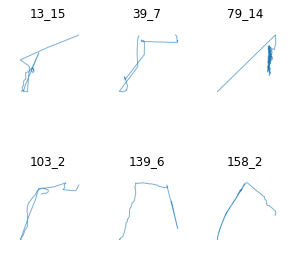

In [75]:
# plot categorized as 0
plt.figure()

rows,cols = 2,3
fig, ax = plt.subplots(rows, cols,
                      #  sharex='col', 
                      #  sharey='row',
                       figsize=(5, 5))

for row in range(rows):
    for col in range(cols):
        ax[row,col].imshow(Image.open(files[zero[row*cols + col]]))
        ax[row,col].axis('off')
        ax[row,col].set_title(Path(files[zero[row*cols + col]]).stem)

## Two

<Figure size 432x288 with 0 Axes>

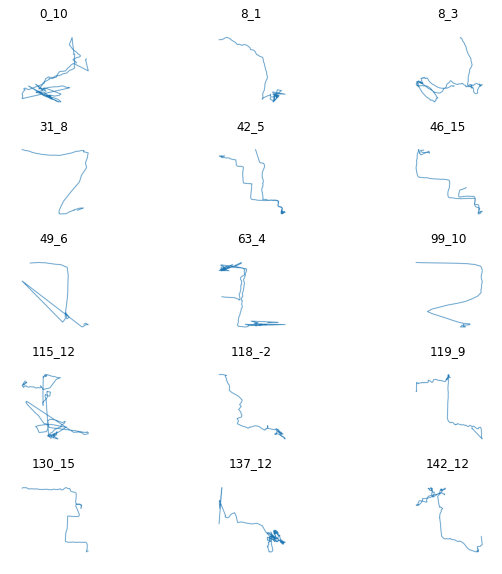

In [78]:
# plot categorized as 2
plt.figure()

rows,cols = 5,3
fig, ax = plt.subplots(rows, cols,
                       figsize=(10, 10))

for row in range(rows):
    for col in range(cols):
        ax[row,col].imshow(Image.open(files[two[row*cols + col]]))
        ax[row,col].axis('off')
        ax[row,col].set_title(Path(files[two[row*cols + col]]).stem)

## Seven

<Figure size 432x288 with 0 Axes>

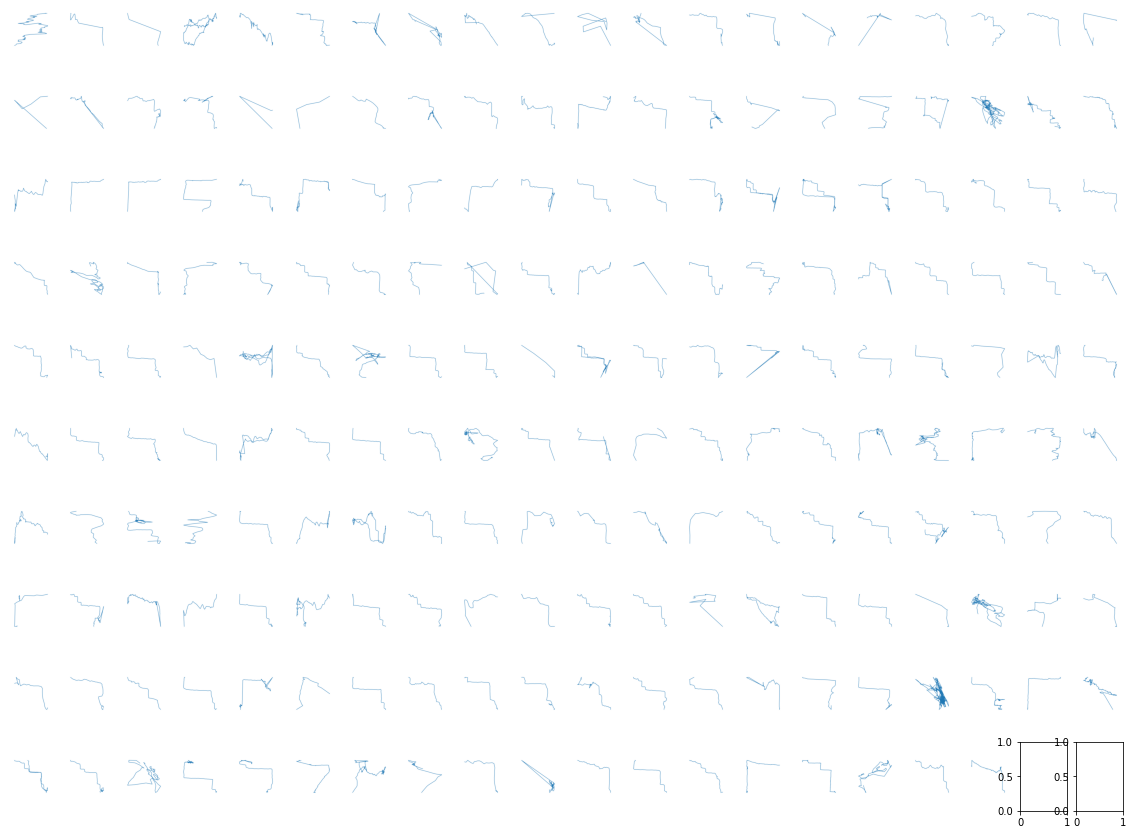

In [80]:
# plot categorized as 7
plt.figure()

rows,cols = 10,20
fig, ax = plt.subplots(rows, cols,
                       figsize=(20, 15))

for row in range(rows):
    for col in range(cols):
        if (row*cols + col < len(seven)):
          ax[row,col].imshow(Image.open(files[seven[row*cols + col]]))
          ax[row,col].axis('off')
          # ax[row,col].set_title(Path(files[seven[row*cols + col]]).stem)

## Four

<Figure size 432x288 with 0 Axes>

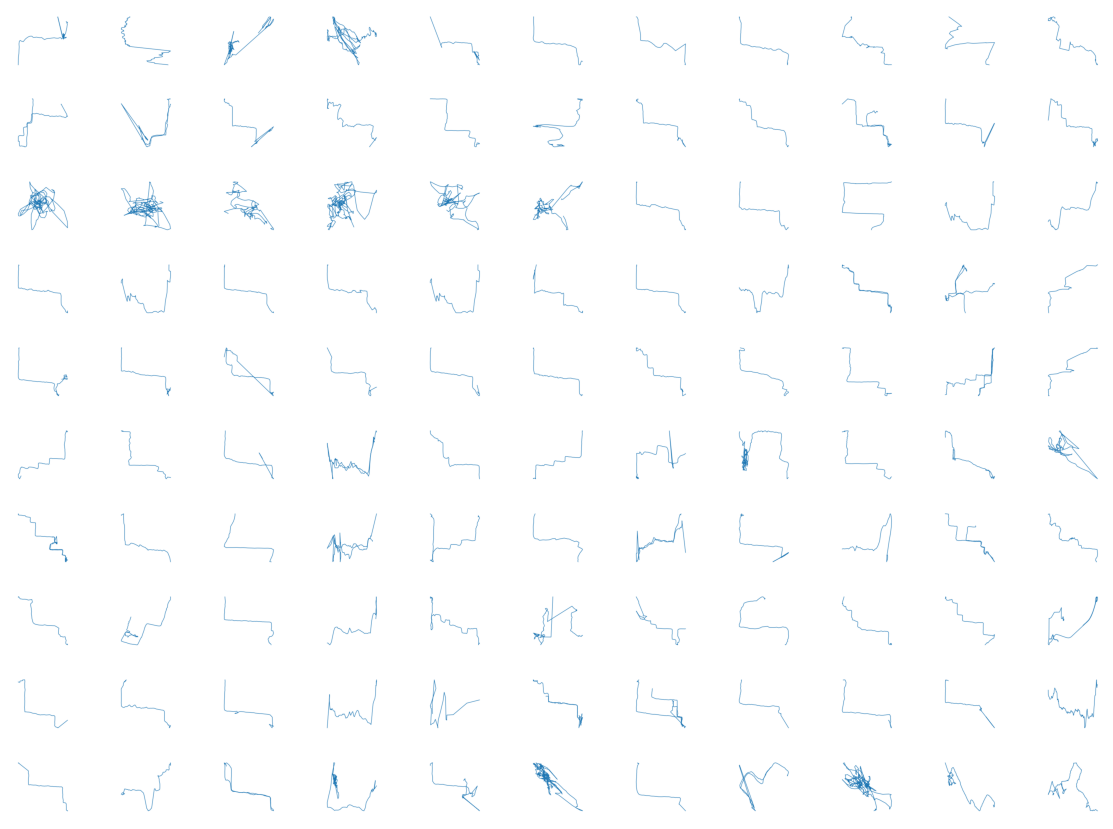

In [66]:
# plot categorized as 4
plt.figure()

rows,cols = 10,11
fig, ax = plt.subplots(rows, cols,
                       figsize=(20, 15))

for row in range(rows):
    for col in range(cols):
        if (row*cols + col < len(four)):
          ax[row,col].imshow(Image.open(files[four[row*cols + col]]))
          ax[row,col].axis('off')

## One

<Figure size 432x288 with 0 Axes>

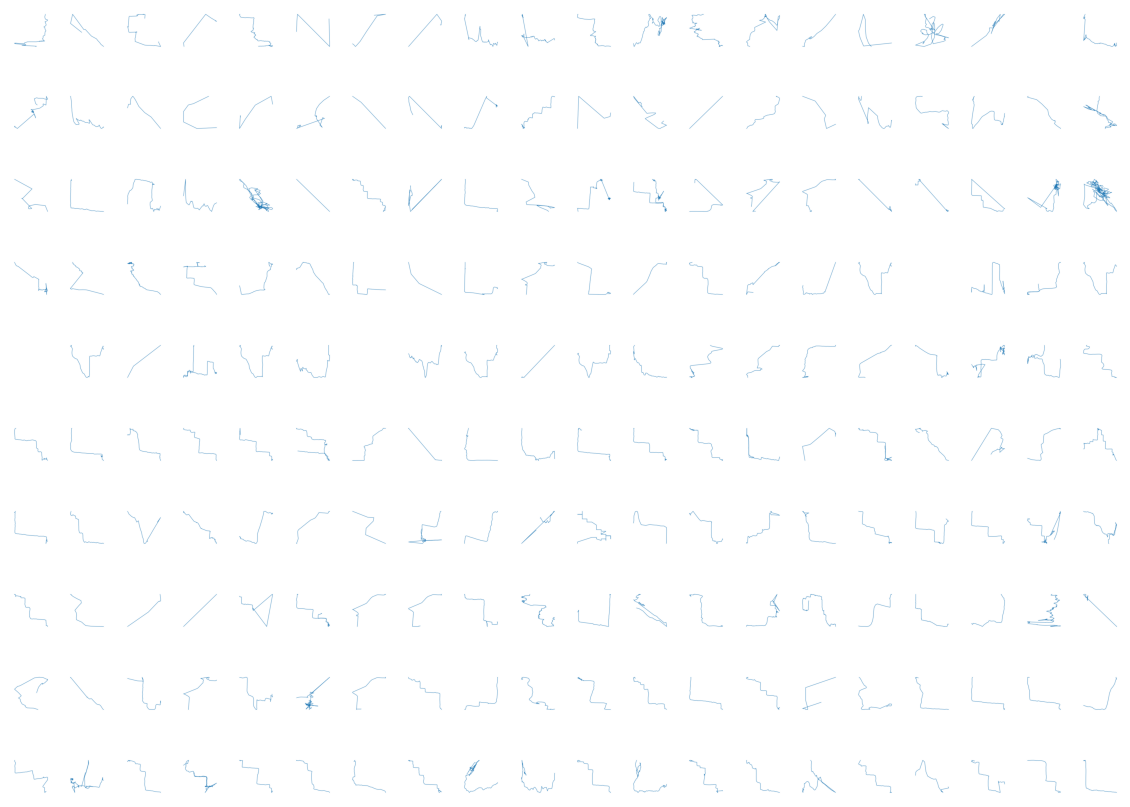

In [67]:
# plot categorized as 1
plt.figure()

rows,cols = 10,20
fig, ax = plt.subplots(rows, cols,
                       figsize=(20, 15))

for row in range(rows):
    for col in range(cols):
        if (row*cols + col < len(one)):
          ax[row,col].imshow(Image.open(files[one[row*cols + col]]))
          ax[row,col].axis('off')

## Five

<Figure size 432x288 with 0 Axes>

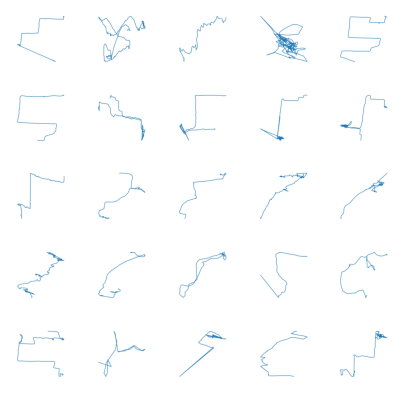

In [71]:
# plot categorized as 5
plt.figure()

rows,cols = 5,5
fig, ax = plt.subplots(rows, cols,
                       figsize=(7, 7))

for row in range(rows):
    for col in range(cols):
          ax[row,col].imshow(Image.open(files[five[row*cols + col]]))
          ax[row,col].axis('off')